<a href="https://colab.research.google.com/github/AlexUrtubia/diabetes_prediction/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Planteamiento del problema

Se solitica crear un modelo predictivo de machine learning capaz de predecir, la presencia o no de diabetes aplicado sobre un dataset que contiene información sobre un grupo de pacientes basado en una serie de diagnósticos realizados sobre ellos.

# Creando el dataframe
En primer lugar es necesario crear el dataframe original, a partir de algún archivo externo que necesite ser cargado a google colab para trabajar sobre este

In [ ]:
# Al importar drive de google.colab, se concede acceso a nuestro contenido guardado en Drive
from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# También es necesario importar las demás librerías para la manipulación y visualización de los datos
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Se indica la ruta del archivo que se necesite utilizar como base del dataframe en una variable 
# y posteriormente (para este caso), se utiliza 'read_csv' de pandas para la lectura del archivo csv 
filename = '/content/drive/MyDrive/Examen 2/Belt2_B_diabetes_v2_final.csv'
df = pd.read_csv(filename)
df # Se imprime el dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,WeightGroup,AgeGroup,Gender,Outcome
0,4,189.0,110.0,31.0,NaN,0_68,overweight,18 - 44,F,0
1,2,157.0,74.0,35.0,440.0,0.134,obese_2,18 - 44,F,0
2,6,98.0,58.0,33.0,190.0,0.43,obese_1,18 - 44,F,0
3,6,111.0,64.0,39.0,NaN,0.26,obese_1,18 - 44,F,0
4,3,106.0,72.0,NaN,NaN,0_207,overweight,18 - 44,F,0
...,...,...,...,...,...,...,...,...,...,...
637,5,144.0,82.0,26.0,285.0,0.452,obese_1,45 - 64,F,1
638,4,171.0,72.0,NaN,NaN,0.479,obsese_3,18 - 44,F,1
639,8,176.0,90.0,34.0,300.0,0.467,obese_1,45 - 64,F,1
640,0,104.0,64.0,37.0,64.0,0.51,obese_1,18 - 44,M,1


# Vista preliminar dataframe

In [ ]:
# 'info' proporciona información importante acerca del df, tal como cantidad de elementos, filas, columnas, 
# sus nombres, el tipo de variable que guarda cada columna y la cantidad de datos no-nulos de cada una
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               642 non-null    int64  
 1   Glucose                   638 non-null    float64
 2   BloodPressure             616 non-null    float64
 3   SkinThickness             455 non-null    float64
 4   Insulin                   331 non-null    float64
 5   DiabetesPedigreeFunction  642 non-null    object 
 6   WeightGroup               642 non-null    object 
 7   AgeGroup                  642 non-null    object 
 8   Gender                    642 non-null    object 
 9   Outcome                   642 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 50.3+ KB


Es posible observar que hay 642 filas o pacientes en este caso, con 10 columnas o atributos por cada uno.

Los tipos de datos se distribuyen entre objetos o strings, enteros y flotantes.

Además, a simple vista se observa que de el total de filas, 4 de ellas contienen valores nulos.

In [ ]:
# El método describe, retorna información estadística básica sobre el contenido de cada columna no categórica. Es posible ver la cantidad de datos, el promedio, 
# Desviación estandar, minimos, máximos y porcentiles.

#Al tratarse de tantas columnas, es mejor mostrarlas en dos partes, la primera corresponde a todas las filas de las priemras 13 columnas
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Outcome
count,642.000000,638.000000,616.000000,455.000000,331.000000,642.000000
mean,5.453271,124.043887,72.397727,29.483516,158.996979,0.422118
std,39.460225,30.756980,12.306886,10.527458,117.255057,0.494282
min,0.000000,56.000000,24.000000,7.000000,14.000000,0.000000
25%,1.000000,100.000000,64.000000,22.000000,82.500000,0.000000
50%,3.000000,121.000000,72.000000,30.000000,130.000000,0.000000
75%,6.000000,144.000000,80.000000,36.500000,192.500000,1.000000
max,1000.000000,199.000000,114.000000,99.000000,846.000000,1.000000


Al analizar la concordancia de los datos, es necesario también observar el diccionario de datos otorgado como información preliminar para este proyecto.


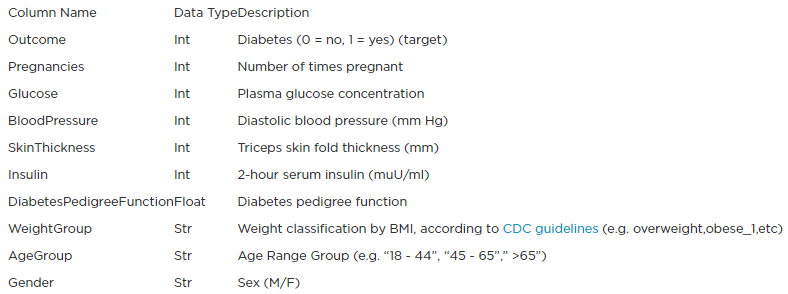

Se observa que para la columna que relaciona la cantidad de embarazos, esta va desde 0 hasta 1000, lo que evidentemente es un error; los rangos de glocusa, parecen estar normales de acuerdo a lo consultado en la web; lo mismo para la presión sanguínea; el grosor de piel contiene valores atípicos, especialmente en los niveles más altos, se aplicará un corte en su rango que no esté muy alejado del promedio; la insulina también presenta valores atípicos tanto en el minimo como en el máximo, por lo que se le aplicará un filtro. 
Se analizará más adelante como lidiar con estos datos.

Se adjunta la documentación encontrada al respecto:

* [Glucosa](https://www.cdc.gov/diabetes/spanish/basics/getting-tested.html#:~:text=Los%20valores%20de%20az%C3%BAcar%20en,mayores%20indican%20que%20tiene%20diabetes.&text=Esta%20prueba%20mide%20sus%20niveles,un%20l%C3%ADquido%20que%20contiene%20glucosa.)

* [Presión Diastólica](https://cuidateplus.marca.com/alimentacion/nutricion/2018/09/10/pasos-bajar-tension-arterial-167116.html)

* [Triceps skin fold thickness (mm)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5083983/)

* [Insulina](https://www.tuasaude.com/es/resistencia-a-la-insulina/)

# Manipulando el dataframe

En primer lugar, se busca determinar qué valores contiene cada columna, para esto se utiliza sobre el data frame 'value_counts()' que además de mostrar los valores de cada columna, muestra la frecuencia con que aparece cada valor. 

In [ ]:
# Se crea un iterador que recorre el dataframe consultando los valores de cada columna, y la suma de todos (para comprobar la existencia de valores nulos)
# De esta manera se consulta por todos los datos en un solo código.

for i in df.columns:
  print("Columna",i.upper())
  print(df[i].value_counts(),"\n")
  print("Total de datos", df[i].value_counts().sum())
  print("___________________\n")

Columna PREGNANCIES
1       109
0        95
2        87
3        60
4        55
5        44
6        41
7        41
8        33
9        25
10       21
11       10
13        9
12        8
14        2
1000      1
15        1
Name: Pregnancies, dtype: int64 

Total de datos 642
___________________

Columna GLUCOSE
99.0     15
129.0    13
125.0    13
106.0    12
111.0    11
         ..
56.0      1
74.0      1
76.0      1
77.0      1
186.0     1
Name: Glucose, Length: 131, dtype: int64 

Total de datos 638
___________________

Columna BLOODPRESSURE
70.0     52
74.0     42
64.0     38
78.0     38
68.0     37
76.0     35
72.0     34
62.0     32
80.0     31
60.0     30
82.0     28
66.0     25
84.0     21
88.0     20
90.0     19
58.0     19
86.0     18
56.0     10
50.0      9
52.0      9
54.0      8
75.0      8
94.0      5
92.0      4
44.0      4
85.0      4
96.0      4
65.0      3
110.0     3
48.0      3
98.0      3
100.0     3
108.0     2
46.0      2
30.0      2
106.0     2
104.0     2
40.0 

Es posible observar cómo se distribuyen los valores de cada columna, la presencia de outliers se vuelve más evidente, así como también que para las columnas con valores categóricos, es necesario aplicar alguna estandarización en los datos. 

Otro factor importante a realizar antes de tratar con los datos nulos y la estandarización de datos, es convertir los tipos de datos según lo requerido. 

De acuerdo al diccionario de datos otorgado, la columna 'DiabetesPedigreeFunction' debe ser un float, pero como se observa al imprimir el dataframe, esta columna contiene valores tales como '0_68' que necesitan estandarizarse.

In [ ]:
# Se reemplaza cada "_" con un punto para que quede bajo el formato float
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].str.replace("_",".")
# Y luego, utilizando astype() se indica el tipo de dato al que queramos cambiar los datos de la columna
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].astype(float)

In [ ]:
# Se observa con el método value_counts() cómo quedan distribuidos los valores
df['DiabetesPedigreeFunction'].value_counts()

0.261    5
0.254    5
0.284    4
0.238    4
0.260    4
        ..
0.252    1
0.145    1
0.271    1
1.699    1
2.420    1
Name: DiabetesPedigreeFunction, Length: 455, dtype: int64

Al tratarse de una columna numérica ahora, es necesario también comprobar si contiene outliers.

In [ ]:
# Esto se realiza utilizando el método 'describe()' sobre la columna
df['DiabetesPedigreeFunction'].describe()

count    642.000000
mean       0.474970
std        0.332541
min        0.085000
25%        0.247000
50%        0.378000
75%        0.629750
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

Basandose en la información estadística observada, se eliminarán aquellos valores que son mayores a 1.
Esto se realizará más adelante.

Como se mencionó anteriormente, es necesario estandarizar los tipos de datos para las columnas categóricas para que solamente existan valores según los parámetros solicitados.

In [ ]:
# Se itera a traves de las columns de tipo objeto consultando sus valores únicos
for i in df.select_dtypes('object').columns:
  print(i,df[i].unique())

WeightGroup ['overweight' 'obese_2' 'obese_1' 'obsese_3' 'healthy weight' 'MISSING'
 'underweight']
AgeGroup ['18 - 44' '45 - 64' '<65' '>65']
Gender ['F' 'm' 'M']


In [ ]:
# Se itera a traves del dataframe con un for consultando con loc si es que el elemento de cada fila y columna coincide con lo buscado 
# Para la columna 'Gender', busca los valores definidos como 'm', y se asigna como 'M', para los grupos etarios definidos como menores a 65, se asignan directamente como '45 - 64'. 
# Para los valores MISSING de WeightGroup, se les asigna NaN como valor para ser tratado más adelante, y también se corrige el error de tipeo para los valores 'obsese_3'

for i in range (len(df)):
  if df.loc[i, 'Gender'] == 'm':
    df.loc[i, 'Gender'] = 'M'
  if df.loc[i, 'AgeGroup'] == '<65':
    df.loc[i, 'AgeGroup'] = '45 - 64'
  if df.loc[i, 'WeightGroup'] == 'MISSING':
    df.loc[i, 'WeightGroup'] = 'NaN'
  if df.loc[i, 'WeightGroup'] == 'obsese_3':
    df.loc[i, 'WeightGroup'] = 'obese_3'


In [ ]:
# Se comprueban nuevamente los valores únicos de estas columnas
for i in df.select_dtypes('object').columns:
  print(i,df[i].unique())

# Se observa que ahora sí estan estandarizadas.

WeightGroup ['overweight' 'obese_2' 'obese_1' 'obese_3' 'healthy weight' 'NaN'
 'underweight']
AgeGroup ['18 - 44' '45 - 64' '>65']
Gender ['F' 'M']


Por último, consultamos por los tipos de dtos que maneja cada columna para comprobar que coincidan con lo solicitado.

In [ ]:
# Se consulta utilizando dtypes()
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
DiabetesPedigreeFunction    float64
WeightGroup                  object
AgeGroup                     object
Gender                       object
Outcome                       int64
dtype: object

Una vez que coinciden los tipos de datos, se procede a eliminar outliers.

# Eliminación de outleirs

De acuerdo a lo revisado anteriormente, se aplican filtros a cada columna para que los datos sean más concordantes con la realidad.

Se observa que para la columna que relaciona la cantidad de embarazos, esta va desde 0 hasta 1000, lo que evidentemente es un error; los rangos de glocusa, parecen estar normales de acuerdo a lo consultado en la web; lo mismo para la presión sanguínea; el grosor de piel contiene valores atípicos, especialmente en los niveles más altos, se aplicará un corte en su rango que no esté muy alejado del promedio; la insulina también presenta valores atípicos tanto en el minimo como en el máximo, por lo que se le aplicará un corte. 
Se analizará más adelante como lidiar con estos datos.

In [ ]:
# Se aplica un filtro para eliminar los valores superiores a 14 embarazos
df = df[df['Pregnancies']<14]

In [ ]:
# ¿Existirá por algún error de tipeo embarazos en hombres?
preg = df['Pregnancies']>0
df[preg][df['Gender']=='M']

# Al aplicar un filtro se observa que no se encuentran hombres con cantidad de embarazos superior a 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,WeightGroup,AgeGroup,Gender,Outcome


In [ ]:
# Para 'SkinThickness', se eliminan los valores mayores a 55
df = df[df['SkinThickness'] < 55]

In [ ]:
# Se eliminan los valores con insulina mayor a 500
df = df[df['Insulin'] < 500]

In [ ]:
# Y también los valores con DiabetesPedigreeFunction mayor a 1
df = df[df['DiabetesPedigreeFunction'] <= 1]

In [ ]:
#  Se comprueba como luce ahora el df
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,WeightGroup,AgeGroup,Gender,Outcome
1,2,157.0,74.0,35.0,440.0,0.134,obese_2,18 - 44,F,0
2,6,98.0,58.0,33.0,190.0,0.430,obese_1,18 - 44,F,0
9,7,81.0,78.0,40.0,48.0,0.261,obese_3,18 - 44,F,0
10,6,108.0,44.0,20.0,130.0,0.813,healthy weight,18 - 44,F,0
13,1,164.0,82.0,43.0,67.0,0.341,obese_1,45 - 64,F,0
...,...,...,...,...,...,...,...,...,...,...
632,6,104.0,74.0,18.0,156.0,0.722,overweight,18 - 44,F,1
635,8,196.0,76.0,29.0,280.0,0.605,obese_2,45 - 64,F,1
637,5,144.0,82.0,26.0,285.0,0.452,obese_1,45 - 64,F,1
639,8,176.0,90.0,34.0,300.0,0.467,obese_1,45 - 64,F,1


In [ ]:
# Al volver a consultar la info del df, vemos que ahora hay 294 filas y los tipos de datos concuerdan con lo solicitado.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 1 to 640
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               294 non-null    int64  
 1   Glucose                   294 non-null    float64
 2   BloodPressure             294 non-null    float64
 3   SkinThickness             294 non-null    float64
 4   Insulin                   294 non-null    float64
 5   DiabetesPedigreeFunction  294 non-null    float64
 6   WeightGroup               294 non-null    object 
 7   AgeGroup                  294 non-null    object 
 8   Gender                    294 non-null    object 
 9   Outcome                   294 non-null    int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 25.3+ KB


In [ ]:
# Al consultar con describe la información estadística, ahora todos los datos concuerdan con la información obtenida.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Outcome
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,3.377551,122.360544,70.193878,28.775510,146.894558,0.450337,0.346939
std,3.106248,30.209382,12.565725,10.299141,94.645228,0.218573,0.476808
min,0.000000,56.000000,24.000000,7.000000,15.000000,0.085000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,78.250000,0.262500,0.000000
50%,2.000000,120.000000,70.000000,29.000000,127.500000,0.424500,0.000000
75%,5.000000,142.000000,78.000000,36.000000,187.250000,0.611000,1.000000
max,13.000000,198.000000,110.000000,52.000000,495.000000,0.970000,1.000000


# Datos nulos

En caso de existir datos faltantes, es necesario decidir que hacer con ellos, se vuelve a analizar con mayor detalle los datos nulos.

In [ ]:
# Una manera de revisar columna por columna la cantidad de datos nulos que contiene cada una, 
# es utilizando el método 'isnull()', que retorna una copia del df original pero con valores booleanos que indican si el valor es un dato nulo o no
# Al añadir sum, se suma la cantidad de 'True' (o valores efectivamente nulos) contenidas en el dt creado 
df.isnull().sum()
# Podemos observar que luego de aplicar los filtros no existen datos nulos.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
DiabetesPedigreeFunction    0
WeightGroup                 0
AgeGroup                    0
Gender                      0
Outcome                     0
dtype: int64

# Datos duplicados

Siempre es necesario comprobar la existencia de valores duplicados y tratarlos si es que se encuentran

In [ ]:
# El método duplicated retorna una serie de pandas con True o False indicando la posición de posibles datos falsos en cada fila
# Al añadir .sum se obtiene la totalidad de datos duplicados a lo largo de toda la serie

df.duplicated().sum()

# Es posible observar que en este caso, no existen filas con datos duplicados

0

# Explorando datos

Antes de generar correlaciones, análisis y conclusiones, es necesario entender los datos que estamos manejando, como se distribuyen, qué hay de cada tipo, cuantos hay, etc. Y la mejor manera para endenterlo es mediante gráficos.

Text(0.5, 1.0, 'Presencia de diabetes')

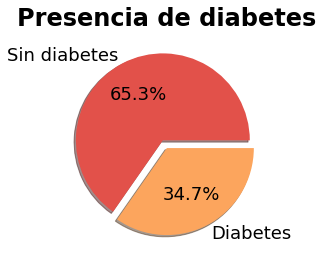

In [ ]:
# Se plotea un gráfico de torta con la cantidad de desertores y no desertores.

plt.pie(df['Outcome'].value_counts().values, # Primero se indican los datos a graficar
        labels=['Sin diabetes','Diabetes'], # Se indican las etiquetas, que en este caso indican la presencia o ausencia de diabetes
        autopct='%1.1f%%', # autopct corresponde a una etiqueta interna que demuestra el porcentaje de cada porción para este caso
        explode=[0.1,0.0], # explode separa cada porción del gráfico de torta
        colors=sns.color_palette('Spectral'), # se utilizan colores de una paleta de colores de seaborn
        shadow=True, # Se incorpora una sombra
        textprops={'fontsize': 18}) # Se modifican los tamaños de las etiquetas
plt.title("Presencia de diabetes", size=24, pad=14, fontweight='bold') # Se añade un título con sus respectivas características

De este gráfico podemos visualizar la cantidad de pacientes que presentan diabetes o no, se observa que la mayoría no tiene esta enfermedad.

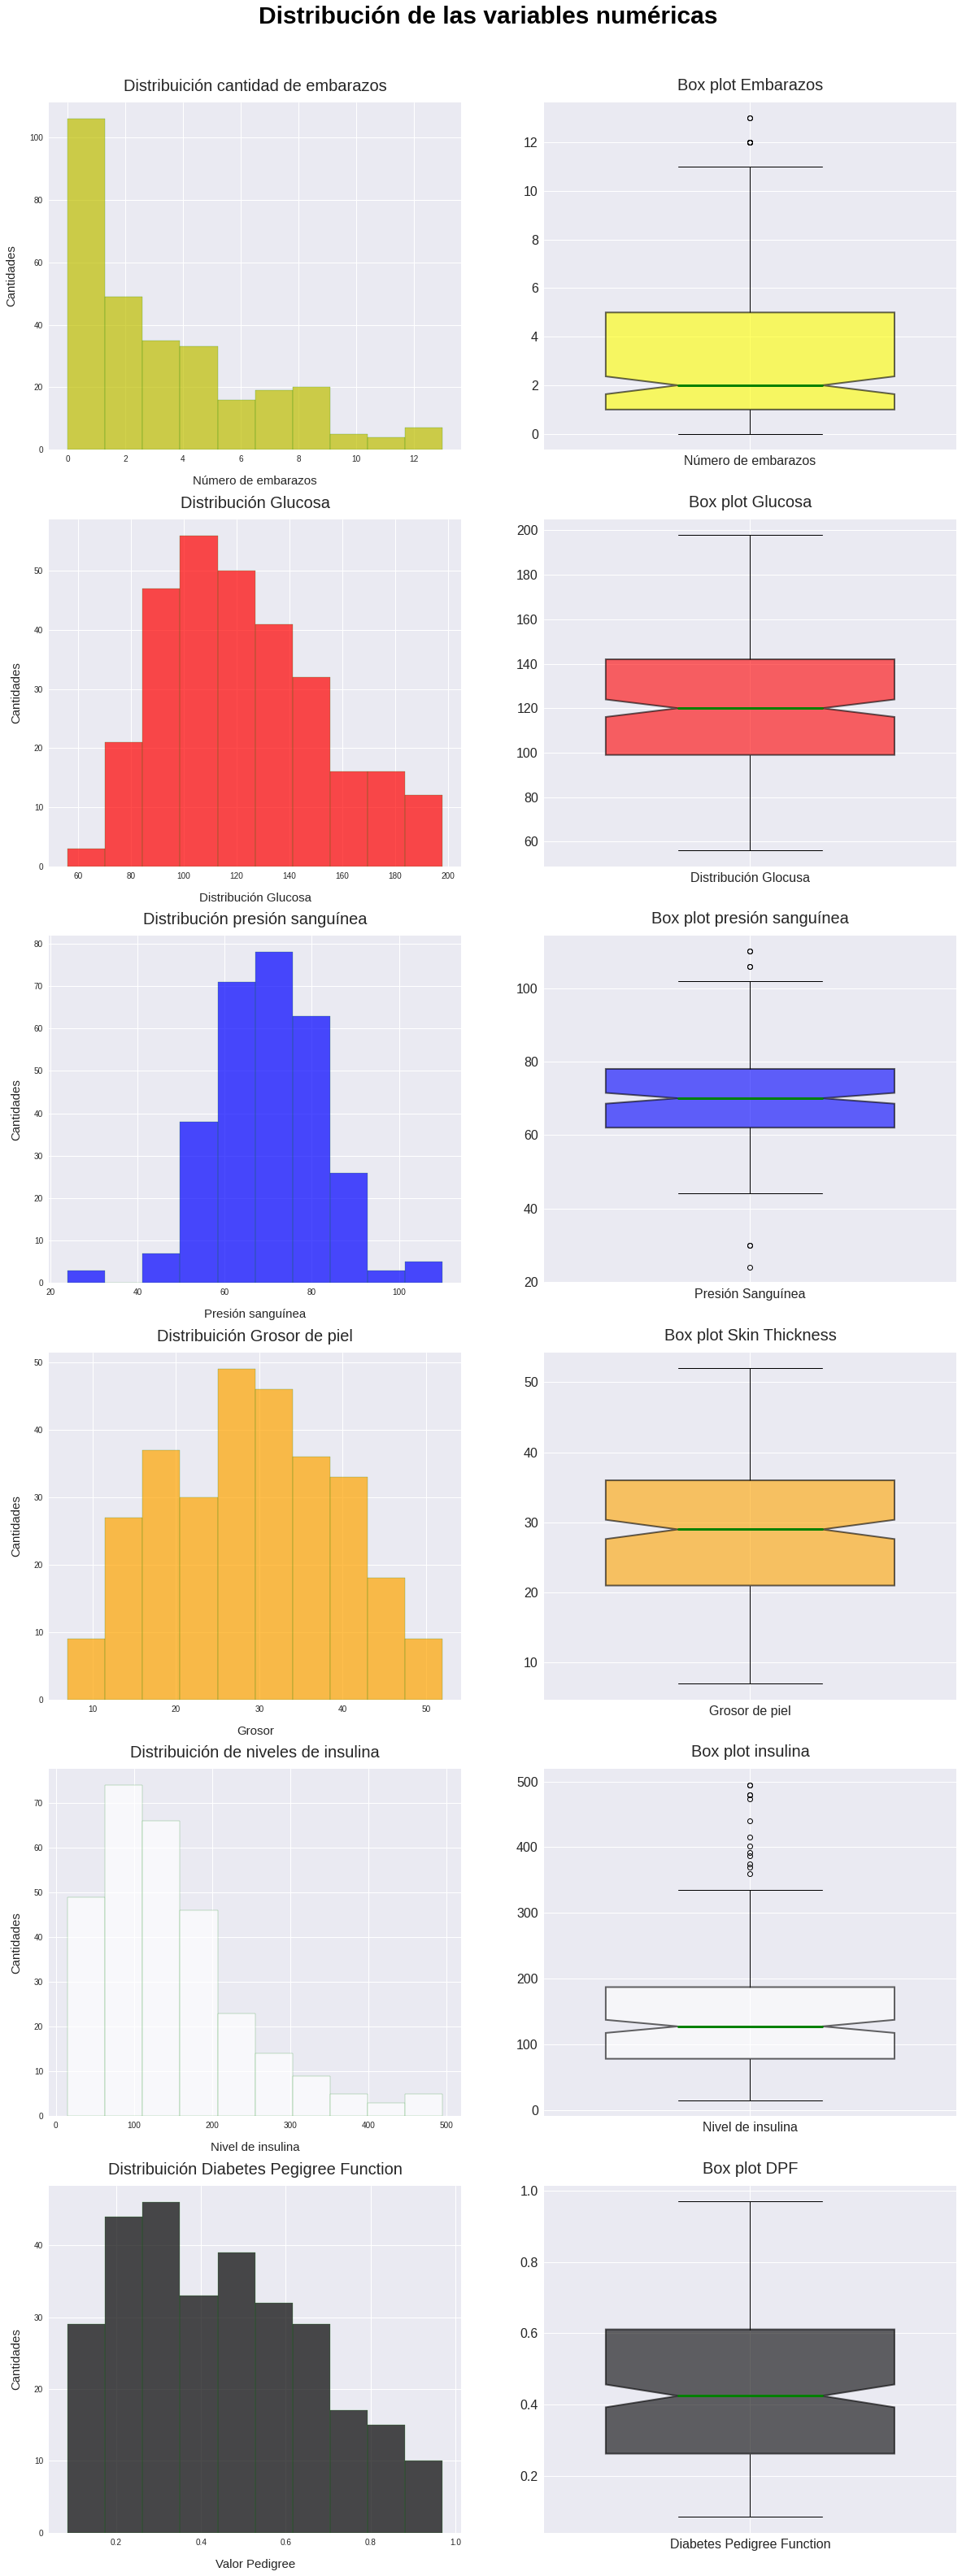

In [ ]:
# Se instancia una figura con sus proporciones
fig1 = plt.figure(figsize=(20, 55))
# Se añade un título
fig1.suptitle("Distribución de las variables numéricas",fontsize=30, fontweight='bold', y=.91)
# Y un estilo, que para este caso es el estilo de la librería seaborn
plt.style.use('seaborn')


# Se añade un subplot de seis filas con dos columnas, este subplot es el primero de la fila
ax1 = fig1.add_subplot(6,2,1) #1ra fila, 1ra columna, gráfico 1.
df['Pregnancies'].hist(bins = 10, color='y', edgecolor='g', alpha=.7) # Se grafica un histograma de la columna 'Pregnancies', con sus respectivos parámetros
plt.xlabel("Número de embarazos", size=15, labelpad=15) # Se añaden las etiquetas para ambos ejes
plt.ylabel("Cantidades", size=15, labelpad=15)
plt.ticklabel_format(useOffset=False, style='plain') # Y se le da un formato a las etiquetas
plt.title("Distribuición cantidad de embarazos", size=20, pad=14)

ax2 = fig1.add_subplot(6,2,2) #1ra fila, 2da columna, gráfico 2.
boxplots = ax2.boxplot(df['Pregnancies'], # Este gráfico es un boxplot
           notch = True, # Se añade una línea en la media
           labels=["Número de embarazos"], # La etiqueta de la columna
           widths = .7, # Su ancho
           patch_artist=True, # patch_artist estando activado, permite ajustar otros parámetros relacionados con los colores del boxplot
           medianprops = dict(linestyle='-', linewidth=3, color='green'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'yellow', alpha = .6)
          );
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('yellow')
plt.title('Box plot Embarazos', fontsize = 20, pad=15);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

# El proceso se repite cambiando las columnas y propiedades 
# ------------------------------------------------------------------

ax3 = fig1.add_subplot(6,2,3) #1ra fila, 1ra columna, gráfico 1.
df['Glucose'].hist(bins = 10, color='r', edgecolor='g', alpha=.7)
plt.xlabel("Distribución Glucosa", size=15, labelpad=15)
plt.ylabel("Cantidades", size=15, labelpad=15)
plt.ticklabel_format(useOffset=False, style='plain')
plt.title("Distribución Glucosa", size=20, pad=14)

ax4 = fig1.add_subplot(6,2,4) #1ra fila, 2da columna, gráfico 2.
boxplots = ax4.boxplot(df['Glucose'],
           notch = True,
           labels=["Distribución Glocusa"],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=3, color='green'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'y', alpha = .6)
          );
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.title('Box plot Glucosa', fontsize = 20, pad=15);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

# ------------------------------------------------------------------

ax5 = fig1.add_subplot(6,2,5) #1ra fila, 1ra columna, gráfico 1.
df['BloodPressure'].hist(bins = 10, color='b', edgecolor='g', alpha=.7)
plt.xlabel("Presión sanguínea", size=15, labelpad=15)
plt.ylabel("Cantidades", size=15, labelpad=15)
plt.ticklabel_format(useOffset=False, style='plain')
plt.title("Distribución presión sanguínea", size=20, pad=14)

ax6 = fig1.add_subplot(6,2,6) #1ra fila, 2da columna, gráfico 2.
boxplots = ax6.boxplot(df['BloodPressure'],
           notch = True,
           labels=["Presión Sanguínea"],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=3, color='green'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'yellow', alpha = .6)
          );
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('blue')
plt.title('Box plot presión sanguínea', fontsize = 20, pad=15);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

# ------------------------------------------------------------------

ax7 = fig1.add_subplot(6,2,7) #1ra fila, 1ra columna, gráfico 1.
df['SkinThickness'].hist(bins = 10, color='orange', edgecolor='g', alpha=.7)
plt.xlabel("Grosor", size=15, labelpad=15)
plt.ylabel("Cantidades", size=15, labelpad=15)
plt.ticklabel_format(useOffset=False, style='plain')
plt.title("Distribuición Grosor de piel", size=20, pad=14)

ax8 = fig1.add_subplot(6,2,8) #1ra fila, 2da columna, gráfico 2.
boxplots = ax8.boxplot(df['SkinThickness'],
           notch = True,
           labels=["Grosor de piel"],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=3, color='green'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'yellow', alpha = .6)
          );
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('orange')
plt.title('Box plot Skin Thickness', fontsize = 20, pad=15);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

# ------------------------------------------------------------------

ax9 = fig1.add_subplot(6,2,9) #1ra fila, 1ra columna, gráfico 1.
df['Insulin'].hist(bins = 10, color='w', edgecolor='g', alpha=.7)
plt.xlabel("Nivel de insulina", size=15, labelpad=15)
plt.ylabel("Cantidades", size=15, labelpad=15)
plt.ticklabel_format(useOffset=False, style='plain')
plt.title("Distribuición de niveles de insulina", size=20, pad=14)

ax10 = fig1.add_subplot(6,2,10) #1ra fila, 2da columna, gráfico 2.
boxplots = ax10.boxplot(df['Insulin'],
           notch = True,
           labels=["Nivel de insulina"],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=3, color='green'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'yellow', alpha = .6)
          );
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('white')
plt.title('Box plot insulina', fontsize = 20, pad=15);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

# ------------------------------------------------------------------

ax11 = fig1.add_subplot(6,2,11) #1ra fila, 1ra columna, gráfico 1.
df['DiabetesPedigreeFunction'].hist(bins = 10, color='k', edgecolor='g', alpha=.7)
plt.xlabel("Valor Pedigree", size=15, labelpad=15)
plt.ylabel("Cantidades", size=15, labelpad=15)
plt.ticklabel_format(useOffset=False, style='plain')
plt.title("Distribuición Diabetes Pegigree Function", size=20, pad=14)

ax12 = fig1.add_subplot(6,2,12) #1ra fila, 2da columna, gráfico 2.
boxplots = ax12.boxplot(df['DiabetesPedigreeFunction'],
           notch = True,
           labels=["Diabetes Pedigree Function"],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=3, color='green'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'r', alpha = .6)
          );
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('black')
plt.title('Box plot DPF', fontsize = 20, pad=15);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

Como se observa en los gráficos anteriores, se comprueba que las distribuciones de las columnas corresponden en su mayoría a una distribución normal, sin una gran presencia de outliers a excepción de la insulinda que sí contiene mayor cantidad de outliers a medida que aumenta su valor.

¿Cómo es la distribución de las variables categóricas?

Text(0.5, 1.0, 'Género')

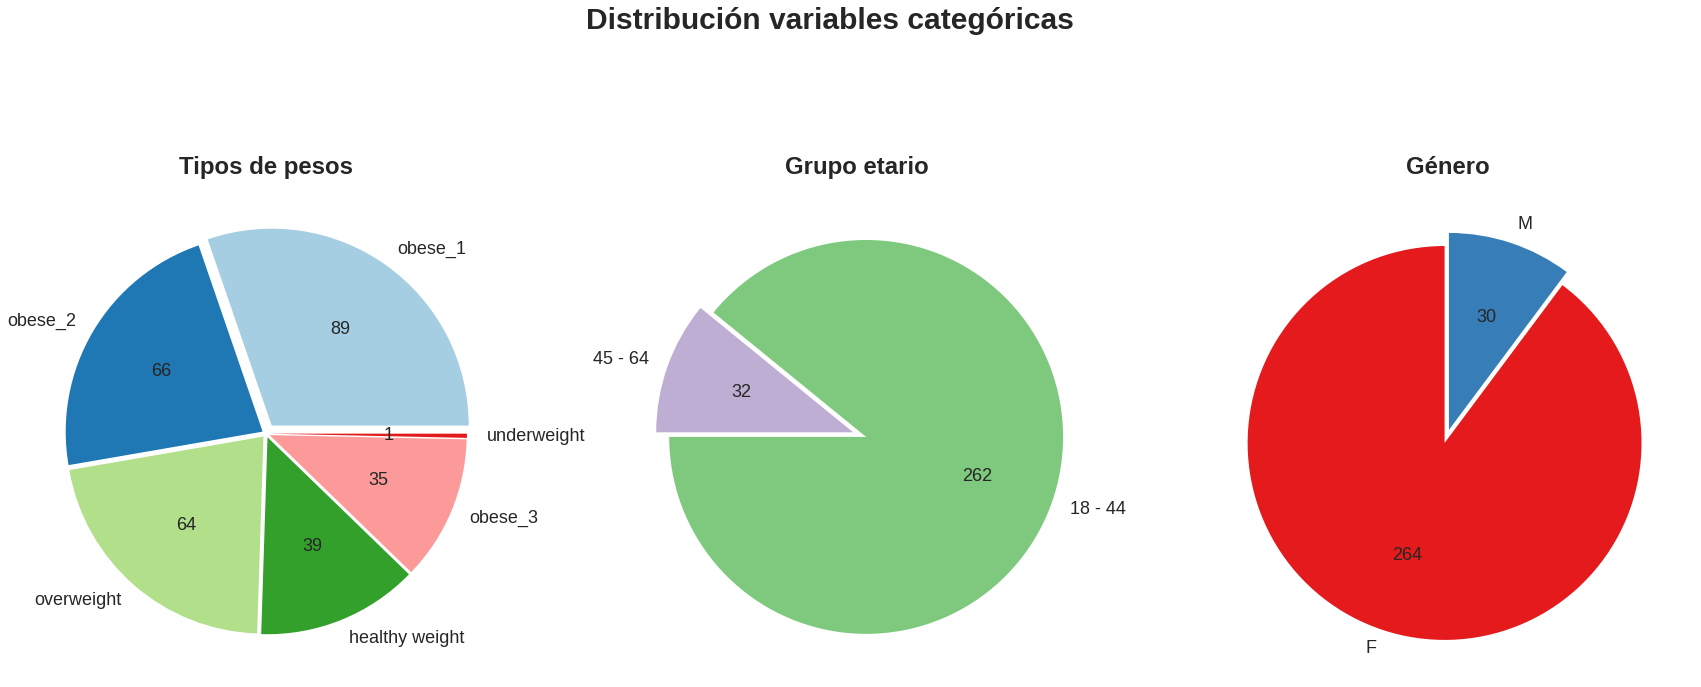

In [ ]:
# Se declara la creación de una figura de tamaño 30x30
plt.figure(figsize=(30,30))
plt.style.use('seaborn') # Se utiliza como estilo seaborn, que contiene una visualización más elegante
plt.suptitle("Distribución variables categóricas",fontsize=30, fontweight='bold', y=.7) # El titulo general de la figura se crea con suptitle de matplotlib, junto con esto se definen sus parámetros, tamaño, tipo de fuente y 'y' que define su posición en el eje y




plt.subplot(1, 3, 1); # La figura contiene 3 subplot de gráficos de torta
plt.pie(df['WeightGroup'].value_counts().values, 
        labels = df['WeightGroup'].value_counts().index,
        # Con sus respectivas etiquetas *** Es importante que el orden de estas coincidan con lo que en este caso arroja value_counts
        autopct=lambda p: '{:.0f}'.format(p * df['WeightGroup'].value_counts().values.sum() / 100), # Para los valores de los labels internos se utiliza lambda con una función que retorne un valor absoluto y no un porcentaje,
                                                              # En este caso corresponde al conteo total de la columna dividido entre 100
        explode=[0.05,0.02,0.02,0.02,0.02,0.02], # explode separa una o todas las porciones del gráfico a cierta distancia indicada en la lista respectivamente
        colors=sns.color_palette('Paired'), # los colores del gráfico están en este caso definido por una paleta de color de seaborn
        startangle = 0,
        textprops={'fontsize': 18})
plt.title("Tipos de pesos", size=24, pad=14, fontweight='bold')


plt.subplot(1, 3, 2); 
plt.pie(df['AgeGroup'].value_counts().values, 
        labels=df['AgeGroup'].value_counts().index,
        autopct=lambda p: '{:.0f}'.format(p * df['AgeGroup'].value_counts().values.sum() / 100), 
        explode=[0.05,0.02], colors=sns.color_palette('Accent'), startangle = 180,textprops={'fontsize': 18})
plt.title("Grupo etario", size=24, pad=14, fontweight='bold')


plt.subplot(1, 3, 3);
plt.pie(df['Gender'].value_counts().values, 
        labels=df['Gender'].value_counts().index ,
        autopct=lambda p: '{:.0f}'.format(p * df['Gender'].value_counts().values.sum() / 100),
        explode=[0.05,0.02], 
        colors=sns.color_palette('Set1'), 
        startangle = 90,
        textprops={'fontsize': 18})
plt.title("Género", size=24, pad=14, fontweight='bold')


Se observa de los gráficos que en relación a las edades, estas de distribuyen mayoritariamente aproximadamente entre los 18 y 44 años; la  gran mayoría de los pacientes tienen algún tipo de sobrepeso y cerca del 80% de esta muestra de pacientes son mujeres

# ¿Cómo se relacionan los datos entre sí?

Una vez comprendidas las distribuiciones de los datos, es posible entender muchas más cosas en relación a los pacientes y su relación con la diabetes.


Pero es posible ir más allá, relacionando los datos bajo condiciones que permitan escudriñar aún más en la información que vamos poco a poco entendiendo.

In [ ]:
# Se agrupan los datos por nivel de educación y deserción, contando cada situación.
df1 = df.groupby(['WeightGroup', 'Outcome'])[['Gender']].count()
df1

# un gruopby retornará una serie o un df multiindice si es que se agrupa por más de una columna como en este caso
# Es posible filtrar por nivel de índice con .get_level_values, no obstante este retornará un array de numpy, el que correspoderá a una lista con listas en su interior
# Este tipo de listas no se pueden graficar tan fácilmente por lo que es mejor obtener de alguna manera los valores de cada lista anidada como valores de una sola lista.

Gender
WeightGroup    Outcome        
healthy weight 0            37
               1             2
obese_1        0            51
               1            38
obese_2        0            37
               1            29
obese_3        0            17
               1            18
overweight     0            49
               1            15
underweight    0             1

In [ ]:
# Utilizando un método encontrado en la web para descomprimir listas anidadas se obtienen valores enteros en una lista y no una lista de listas 
# que están contenidas en un array de numpy
no =  [y for x in df1[df1.index.get_level_values('Outcome')==0].values for y in x]
yes = [y for x in df1[df1.index.get_level_values('Outcome')==1].values for y in x]

Sitio web mencionado para convertir arrays a listas sin listas anidadas

[https://spapas.github.io/2016/04/27/python-nested-list-comprehensions/](https://)

In [ ]:
# Se añade un 0 como último elemento de la lista en yes y se imprimen ambas listas
yes.append(0)
print(yes, no)

[2, 38, 29, 18, 15, 0] [37, 51, 37, 17, 49, 1]


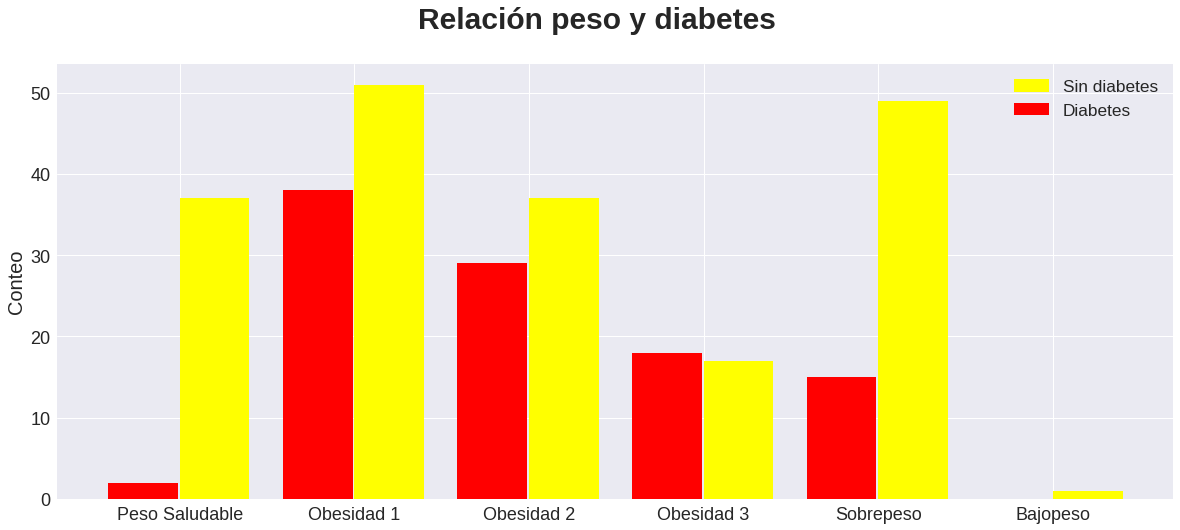

In [ ]:
# Se realiza un gráfico de barras agrupadas para poder comparar aquellos casos en los pacientes tienen diabetes o no

# Para generar este tipo de gráficos, es necesario convertir a una variable numérica las categorías de peso, por lo que se aplica el método map 
# con el mismo orden de df1, el groupby recién creado

x = df1.index.get_level_values('WeightGroup').map({'healthy weight':0, 'obese_1':1, 'obese_2':2, 'obese_3':3, 'overweight':4,'underweight':5}).unique()

# una variable definida como x, nos dará el largo de los ticks, para este caso se utilizan los valores únicos del índice de nivel 'WeightGroup' del groupby previamente creado
# La variable width definirá el ancho de cada barra
width = 0.4
plt.figure(figsize=(20,8))
plt.style.use('seaborn')
plt.suptitle("Relación peso y diabetes",fontsize=30, fontweight='bold')

# Se grafican dos barras por grupo, como eje x, los valores únicos del índice de nivel 'WeightGroup' del groupby, como eje x las listas "desanidadas" con el método mencionado anteriormente
plt.bar(x, no, width, color='yellow', label="Sin diabetes") 
# Hay que notar el hecho de que además del ancho de cada barra y el resto de parámetros, se debe indicar en el eje x, una distancia entre las barras, se indica que la segunda barra estará .41
# unidades a la iquiera de la primera barra  
plt.bar(x-0.41, yes, width, color='red', label="Diabetes")
# Para centrar los ticks del eje x, se indica que estos se ubicarán a la mitad de cada barra para que se vea centrado
plt.xticks(x-0.2,['Peso Saludable', 'Obesidad 1', 'Obesidad 2', 'Obesidad 3', 'Sobrepeso', 'Bajopeso']) 
plt.legend(fontsize='xx-large') # Se agranda el tamaño de la leyenda
plt.ylabel("Conteo", fontsize=20)
plt.xticks(fontsize = 18);
plt.yticks(fontsize = 18);


Observando el gráfico se evidencia el hecho de que a mayor obesidad, mayor es la presencia de diabetes, en los casos en los que el peso es saludable, la cantidad de diabetes es muy menor en comparación a los demás casos.

In [ ]:
# Se crean dos dataframes en donde se agrupa por diabetes positiva y negativa según grupo etario

age0 = df[df['Outcome']== 0].groupby('AgeGroup')[['AgeGroup']].count()
age1 = df[df['Outcome']== 1].groupby('AgeGroup')[['AgeGroup']].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  del sys.path[0]


Text(0.5, 1.0, 'Grupos etarios con diabetes')

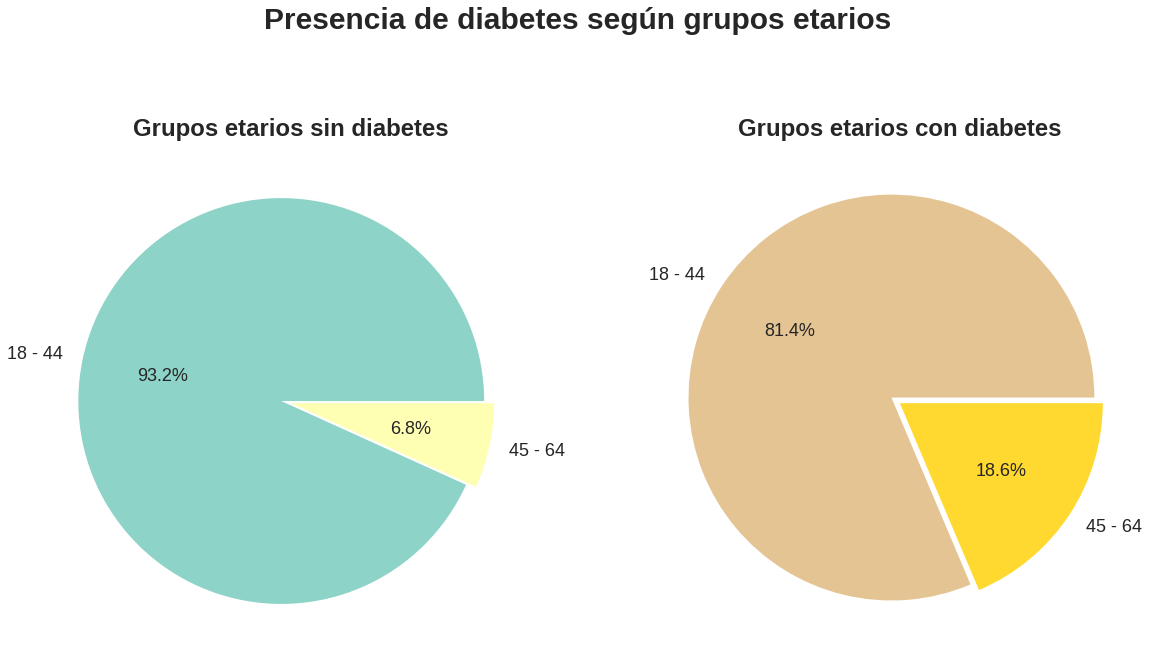

In [ ]:
# Se crea una figura de 2 subplots, con gráficos de barras
plt.figure(figsize=(20,15))
plt.style.use('seaborn')
plt.suptitle("Presencia de diabetes según grupos etarios",fontsize=30, fontweight='bold', y=.87)


plt.subplot(1, 2, 1);
plt.pie(age0.values, labels=age0.index ,autopct='%1.1f%%', explode=[0.05,0.0], colors=sns.color_palette('Set3'), startangle = 0,textprops={'fontsize': 18})
plt.title("Grupos etarios sin diabetes", size=24, pad=14, fontweight='bold')


plt.subplot(1, 2, 2);
plt.pie(age1.values, labels=age1.index ,autopct='%1.1f%%', explode=[0.05,0.0], colors=sns.color_palette('Set2_r'), startangle = 0,textprops={'fontsize': 18})
plt.title("Grupos etarios con diabetes", size=24, pad=14, fontweight='bold')

Se obsera que la distribución es levemente mayor en los rangos etarios mayores.

In [ ]:
# Se crean dos dataframes en donde se agrupa por diabetes positiva y negativa según grupo género

fem = df[df['Gender']== 'F'].groupby('Outcome')[['Outcome']].count()
masc = df[df['Gender']== 'M'].groupby('Outcome')[['Outcome']].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  del sys.path[0]


Text(0.5, 1.0, 'Hombres')

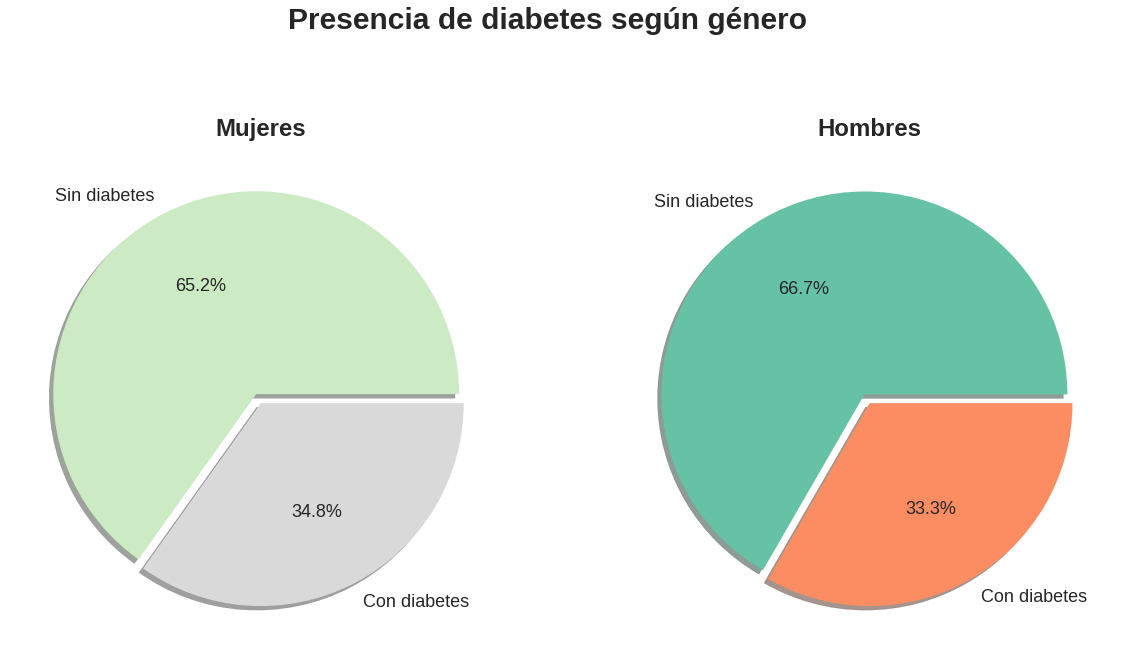

In [ ]:
# Se crea una figura con 2 subplots, ambas son gráficos de barras
plt.figure(figsize=(20,15))
plt.style.use('seaborn')
plt.suptitle("Presencia de diabetes según género",fontsize=30, fontweight='bold', y=.87)


plt.subplot(1, 2, 1);
plt.pie(fem.values, labels=['Sin diabetes', 'Con diabetes'] ,autopct='%1.1f%%', explode=[0.05,0.0], colors=sns.color_palette('Set3_r'), startangle = 0,textprops={'fontsize': 18}, shadow=True)
plt.title("Mujeres", size=24, pad=14, fontweight='bold')


plt.subplot(1, 2, 2);
plt.pie(masc.values, labels=['Sin diabetes', 'Con diabetes'] ,autopct='%1.1f%%', explode=[0.05,0.0], colors=sns.color_palette('Set2'), startangle = 0,textprops={'fontsize': 18}, shadow=True)
plt.title("Hombres", size=24, pad=14, fontweight='bold')

La presencia de diabetes es practicamente igual para hombres y mujeres, el género parece no tener mayor influencia.

Se genera una matriz de correlación para comprender como están relacionadas internamente cada una de las columnas.

Text(0.5, 1.0, 'Matriz de correlación variables numéricas')

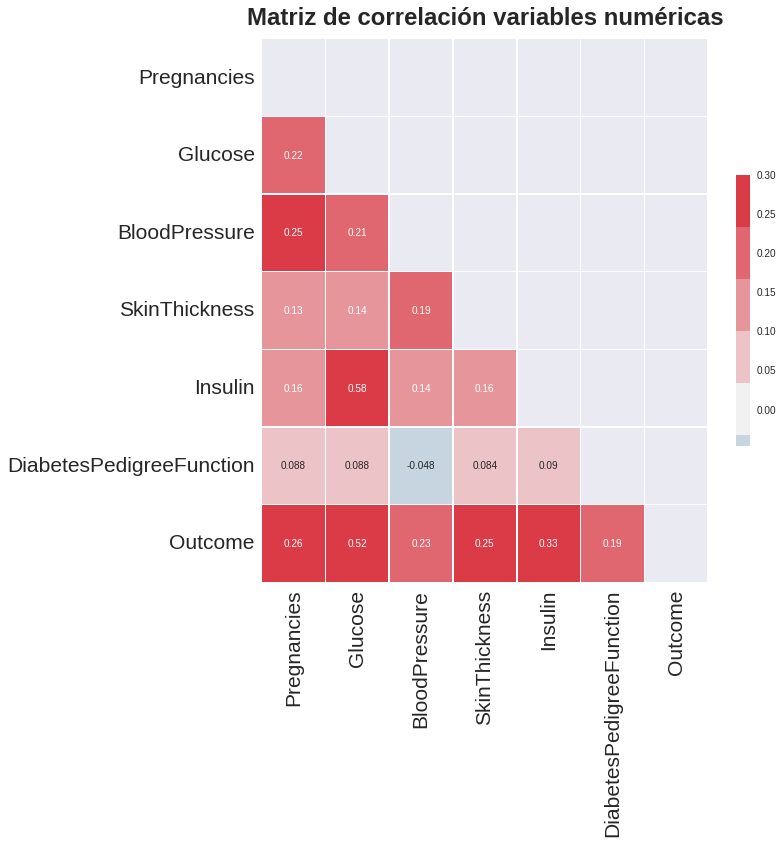

In [ ]:
# Se ejecuta la matriz de correlación

# Se consulta por la correlación del dataframe
correlation= df.corr()

# Y se grafica
mask = np.triu(np.ones_like(correlation, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(240, 10, n=9)
sns.heatmap(correlation, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
             linewidths=.5, cbar_kws={"shrink": .5})
plt.yticks(fontsize=21)
plt.xticks(fontsize=21)
plt.title("Matriz de correlación variables numéricas", size=24, pad=14, fontweight='bold')

Se observa que en general las correlaciones entre las columnas tienen una correlación mediamanente alta entre sí, y específicamente para la columna Outcome, todas los diagnosticos de los pacientes tienen influencia sobre esta, especialmente el nivel de insulina. 

# Conversión a variables numéricas

Todos los modelos predictivos de machine learning, necesitan trabajar sobre variables numéricas para poder funcionar, es por esto que siempre es necesario convertir todas las columnas con valores categóricos a numéricos.

Debido a que la clasificación de los pesos y edades corresponden a variables categóricas ordinales, no es conveniente utilizar el método OneHotEncoder, o get_dummies ya que generarían columnas con valores binarios que no representarían el peso real de cada valor. Por otro lado, el método LabelEncoder que asigna valores numéricos a cada valor de una columna, tampoco asignaría valores que concuerden con los pesos en el orden correcto, por lo que se decide simplemente utilizar el método map para asignar manualmente los valores a utilizar.

Por otro lado, no tendría sentido aplicar algún método que genere más columnas para una columna con solo dos variables como 'Gender'.

In [ ]:
# Se transforman las variables categóricas a numérias utilizando el método map()
# Los valores asignados, son aplicados de acuerdo al orden de cada grupo etario o de peso.
df['WeightGroup'] = df['WeightGroup'].map({'underweight':0,'healthy weight':1, 'overweight':2, 'obese_1':3, 'obese_2':4,'obese_3':5})
df['AgeGroup'] = df['AgeGroup'].map({'45 - 64':1,'18 - 44':0})
df['Gender'] = df['Gender'].map({'F':1,'M':0})

# Generación de modelos


In [ ]:
# Se importan las librerías y módulos para realizar los modelos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Métricas
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, roc_auc_score 

# Clasificadores
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Gridsearch
from sklearn.model_selection import GridSearchCV

In [ ]:
# Se define una función para imprimir la matriz de confusión

def plotCMa(cma,labels):
    cma = cma/cma.sum(axis=1).reshape(-1,1)
    f= plt.figure(figsize=(16, 10))
    plt.matshow(cma, fignum=f.number, cmap=plt.cm.viridis)
    plt.clim(0, 1)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Confusion matrix", fontsize=20)
    plt.xticks(range(len(labels)), [f"{label} (Etiqueta)" for label in labels], fontsize=16)
    plt.yticks(range(len(labels)), [f"{label} (Real)" for label in labels], fontsize=16)
    plt.grid(False)
    ax = plt.gca()

    for i in range(cma.shape[0]):
        for j in range(cma.shape[1]):
            value = cma[i][j]
            ax.text(j,i,"{0:.4f}".format(value),ha="center", va="center", color="w", fontsize=25)

    plt.show()

In [ ]:
# Se guardan en variables las columnas de características (X) y la objetivo a predecir (y)

# Se seleccionan todas las columnas que no sean Outcome para X
X = df.loc[:, df.columns != 'Outcome']
# Para y se seleccionan los valores de la columna Outcome, ya que este es el objetivo a predecir
y = df['Outcome'].values


# Se define las variables de entrenamiento y testeo, con una proporción de 70% para el entrenamiento
# La proporción definida para testeo será utilizada para ajustar los modelos hasta encontrar los mejores resultados.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3, stratify=y) # Se aplica stratify para generar un mejor balanceo, en esta caso para la columna objetivo

# Y se didive la proporción de testeo en un 50% para validación, que es la utilizada para generar las predicciones con datos nunca antes vistos por la máquina
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,test_size=0.5)

# Se estandandarizan
scaler = StandardScaler()
scaler.fit(X_train)

# Y se transforman en valores ajustados.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)


In [ ]:
# Comprobando balanceo de clases en el dataframe
df['Outcome'].value_counts()
unique, counts = np.unique(df['Outcome'].values, return_counts=True)
print("Balanceo en y", unique, counts)

Balanceo en y [0 1] [192 102]


In [ ]:
# Comprobando el balanceo de clases en el split

unique_tr, counts_tr = np.unique(y_train, return_counts=True)
unique_te, counts_te = np.unique(y_test, return_counts=True)
unique_vl, counts_vl = np.unique(y_val, return_counts=True)
print("Balanceo en y_train",unique_tr, counts_tr)
print("Balanceo en y_test",unique_te, counts_te)
print("Balanceo en y_val",unique_vl, counts_vl)

Balanceo en y_train [0 1] [134  71]
Balanceo en y_test [0 1] [26 18]
Balanceo en y_val [0 1] [32 13]


Se observa que los datos estan desbalanceados, tendiendo hacia el diagnóstico negativo para diabetes, es necesario tener esto en consideración para los modelos e hiperparámetros a utilizar

Se solicita generar al menos dos modelos predictivos, se realizará un benchmarking entre los clasificadores de knn, random forest y logisticregressor.

# KNN

In [ ]:
# Se istancia el clasificador knn
knn_cl = KNeighborsClassifier()
# Se entrena el modelo
knn_cl.fit(X_test, y_test) 
# Se generan las predicciones a partir de la proporción de testeo
y_pred_knn=knn_cl.predict(X_test)
# Se calcula y se imprime la precisión de esta proporción de testeo
r2=knn_cl.score(X_test, y_test)
print(r2)

0.8181818181818182


Aunque la precisión del modelo es buena en la proporción de testeo, podría incluso mejorar al ajustar sus hiperparámetros 

In [ ]:
# Se vuelve a generar una predicción, pero esta vez sobre la proporción de validación (la que desconoce la máquina)
predictions_knn = knn_cl.predict(X_val)

# Y se imprimen las métricas correspondientes
print("Accuracy",np.round(knn_cl.score(X_val, y_val),3))
print("Accuracy predicciones", np.round(accuracy_score(y_val, predictions_knn),3))
print("Precision", np.round(precision_score(y_val, predictions_knn),3))
print("Recall / Sensitivity", np.round(recall_score(y_val, predictions_knn),3))
print("Especificidad",np.round(recall_score(y_val, predictions_knn, pos_label=0),3)) # https://interactivechaos.com/es/manual/tutorial-de-machine-learning/la-funcion-precisionscore
print("AUC ROC", np.round(roc_auc_score(y_val, predictions_knn),3))
print("\n",classification_report(y_val, predictions_knn))

# pos_label cambia la clase a la que se le evalúa la precisión, por ende, si aplicamos sobre la clase 2, el resultado sobre TP,NP, etc será inverso
# Debido a que sensitividad es lo opuesto a especificidad, se puede calcular el 'recall inverso' con pos_label
# es decir desde VP/(VP+FN) a VN/(VN+FP)

Accuracy 0.711
Accuracy predicciones 0.711
Precision 0.5
Recall / Sensitivity 0.462
Especificidad 0.812
AUC ROC 0.637

               precision    recall  f1-score   support

           0       0.79      0.81      0.80        32
           1       0.50      0.46      0.48        13

    accuracy                           0.71        45
   macro avg       0.64      0.64      0.64        45
weighted avg       0.70      0.71      0.71        45



Al aplicar el modelo en la proporción de validación, se observa que los resultados no son tan buenos, especialmente en lo relacionado a la distinción entre cada clase de la columna objetivo.

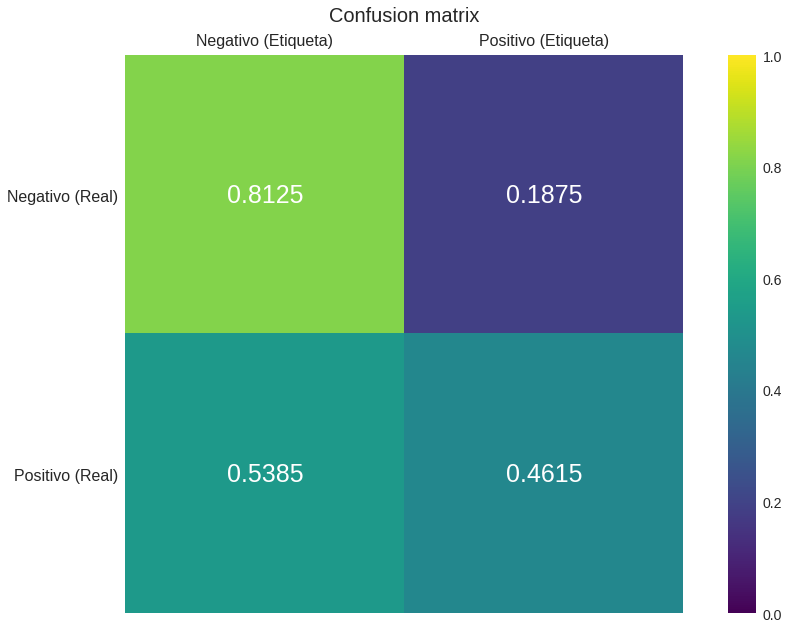

In [ ]:
# Se calcula la matriz de confución entre las predicciones y la columna objetivo con la proporción de validación
cm = metrics.confusion_matrix(y_val,predictions_knn)
plotCMa(cm,['Negativo','Positivo'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


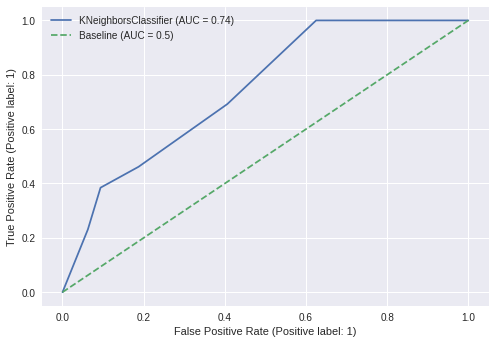

In [ ]:
# Visualizar la curva ROC
plot_roc_curve(knn_cl, X_val, y_val)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend()

Analizando la matriz de confución y de curva roc, se confirma el hecho de que el algoritmo no tiene una buena capacidad de discriminar entre clases, en un 81% aprox acierta a los valores reales positivos, pero menos de la mitad de los valores reales negativos puede discriminarlos.

Una manera de generar un mejor modelo, es utilizando GridSearch de sklearn, que mediante una serie de hiperparámetros de cada modelo establecidos por el usuario, busca los mejores resultados

In [ ]:
# Se define un rango de 1 a 50 y se aplica en 'param_grid' para que itere a través de esa cantidad de vecinos hasta encontrar el mejor resultado
k_range = list(range(1, 50))
param_grid = dict(n_neighbors=k_range)
  
# Se instancia GridSearch con los parámetros necesarios y se entrena sobre las proporciones de validación
# Se indica también que busque el mejor resultado en f1 macro, que retorna un balance entre la presición y el recall.
grid_knn = GridSearchCV(knn_cl, param_grid, cv=5, scoring='f1_macro', return_train_score=False,verbose=1)
# Se entrena la porción de entrenamiento bajo el grid search
grid_knn.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='f1_macro', verbose=1)

In [ ]:
# Se guardan en una variable los resultados de los testeos y se imprimen
cvres = grid_knn.cv_results_
print(cvres['mean_test_score'], cvres['params'])
# Se imprimen el mejor resultado y los mejores hiperparámetros
print('Best Score: %s' % grid_knn.best_score_)
print('Mejores hiperparametros: %s' % grid_knn.best_params_)

[0.63316096 0.5741622  0.62642099 0.59382168 0.63601839 0.60514435
 0.64516906 0.59656926 0.63340368 0.62242983 0.64196061 0.61249208
 0.65310396 0.65191976 0.6587655  0.60854307 0.68031259 0.61991656
 0.63317091 0.60583062 0.64403454 0.61535473 0.61920949 0.60800251
 0.61519503 0.58508093 0.60866448 0.58985919 0.58622929 0.55837692
 0.57084596 0.55837692 0.56331824 0.54561339 0.57872083 0.54561339
 0.55350598 0.5623649  0.57926238 0.58068182 0.60080504 0.57025627
 0.59567038 0.57900718 0.60340692 0.55744108 0.56910052 0.56172579
 0.57338523] [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4}, {'n_neighbors': 5}, {'n_neighbors': 6}, {'n_neighbors': 7}, {'n_neighbors': 8}, {'n_neighbors': 9}, {'n_neighbors': 10}, {'n_neighbors': 11}, {'n_neighbors': 12}, {'n_neighbors': 13}, {'n_neighbors': 14}, {'n_neighbors': 15}, {'n_neighbors': 16}, {'n_neighbors': 17}, {'n_neighbors': 18}, {'n_neighbors': 19}, {'n_neighbors': 20}, {'n_neighbors': 21}, {'n_neighbors': 22

Gridsearch, indica que los mejores resultados para knn se encuentran al ajustar el modelo en 17 vecinos, por lo que se procede a ajustarlo.

In [ ]:
# Se vuelve a generar la clasificación con knn, esta vez utilizando los parámetros obtenidos de gridsearch
# Para observar la precisión en la proporción de testeo

knn_cl = KNeighborsClassifier(n_neighbors=17)
knn_cl.fit(X_train, y_train) 
y_pred_knn=knn_cl.predict(X_test)
r2=knn_cl.score(X_test, y_test)
print(r2)

0.7045454545454546


In [ ]:
# Se vuelve a generar una predicción, pero esta vez sobre la proporción de validación (la que desconoce la máquina)
predictions_knn = knn_cl.predict(X_val)

# Y se imprimen las métricas correspondientes
print("Accuracy",np.round(knn_cl.score(X_val, y_val),3))
print("Accuracy predicciones", np.round(accuracy_score(y_val, predictions_knn),3))
print("Precision", np.round(precision_score(y_val, predictions_knn),3))
print("Recall / Sensitivity", np.round(recall_score(y_val, predictions_knn),3))
print("Especificidad",np.round(recall_score(y_val, predictions_knn, pos_label=0),3)) 
print("AUC ROC", np.round(roc_auc_score(y_val, predictions_knn),3))
print("\n",classification_report(y_val, predictions_knn))

Accuracy 0.756
Accuracy predicciones 0.756
Precision 0.6
Recall / Sensitivity 0.462
Especificidad 0.875
AUC ROC 0.668

               precision    recall  f1-score   support

           0       0.80      0.88      0.84        32
           1       0.60      0.46      0.52        13

    accuracy                           0.76        45
   macro avg       0.70      0.67      0.68        45
weighted avg       0.74      0.76      0.75        45



Los valores de las métricas parecieran indicar que el resultado no es mejor luego de aplicar grid search.

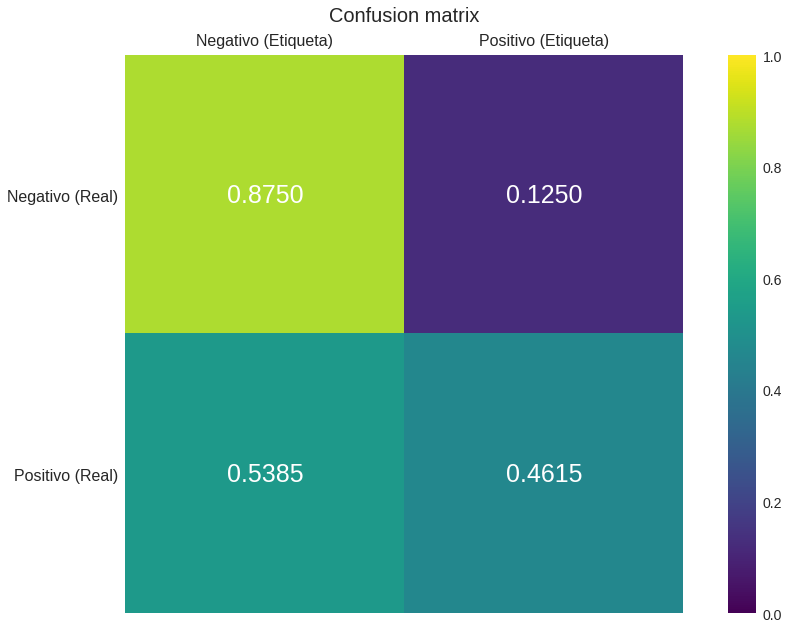

In [ ]:
# Se vuelve a generar la matriz de confusión con los resultados optimizados
cm = metrics.confusion_matrix(y_val,predictions_knn)
plotCMa(cm,['Negativo','Positivo'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


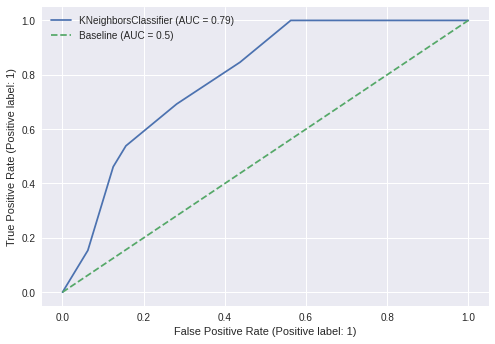

In [ ]:
# Y nuevamente se calcula la curva ROC
plot_roc_curve(knn_cl, X_val, y_val)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend()

Y los gráficos de la curva roc y matriz de confusión confirman lo mismo, el modelo no ha sido capaz de mejorar sustancialmente.

A continuación se procede a ejecutar el mismo procedimiento pero con otros clasificadores.
El proceso siempre es el mismo, se instancia el modelo, se entrena, se generan predicciones para testeo, luego para validación con sus respectivas métricas, se comprueba la matiz de confusión, la curva ROC. Posteriormente se aplica gridsearch para encontrar los mejores hiperparámetros de cada modelo, y se vuelve a repetir el proceso de comprobar métricas y gráficos.

# Random Forest

In [ ]:
rndf_clf = RandomForestClassifier()
rndf_clf.fit(X_train, y_train)
y_pred = rndf_clf.predict(X_test)

rndf_clf.score(X_test, y_test)

0.8181818181818182

In [ ]:
# Se vuelve a generar una predicción, pero esta vez sobre la proporción de validación (la que desconoce la máquina)
predictions_rfcl = rndf_clf.predict(X_val)

# Y se imprimen las métricas correspondientes
print("Accuracy",np.round(rndf_clf.score(X_val, y_val),3))
print("Accuracy predicciones", np.round(accuracy_score(y_val, predictions_rfcl),3))
print("Precision", np.round(precision_score(y_val, predictions_rfcl),3))
print("Recall / Sensitivity", np.round(recall_score(y_val, predictions_rfcl),3))
print("Especificidad",np.round(recall_score(y_val, predictions_rfcl, pos_label=0),3)) 
print("AUC ROC", np.round(roc_auc_score(y_val, predictions_rfcl),3))
print("\n",classification_report(y_val, predictions_rfcl))

Accuracy 0.733
Accuracy predicciones 0.733
Precision 0.538
Recall / Sensitivity 0.538
Especificidad 0.812
AUC ROC 0.675

               precision    recall  f1-score   support

           0       0.81      0.81      0.81        32
           1       0.54      0.54      0.54        13

    accuracy                           0.73        45
   macro avg       0.68      0.68      0.68        45
weighted avg       0.73      0.73      0.73        45



Los resultados con random forest por default no son muy buenos tampoco, yaa que sigue sin ser capaz de distinguir de manera correcta entre las distintas clases.

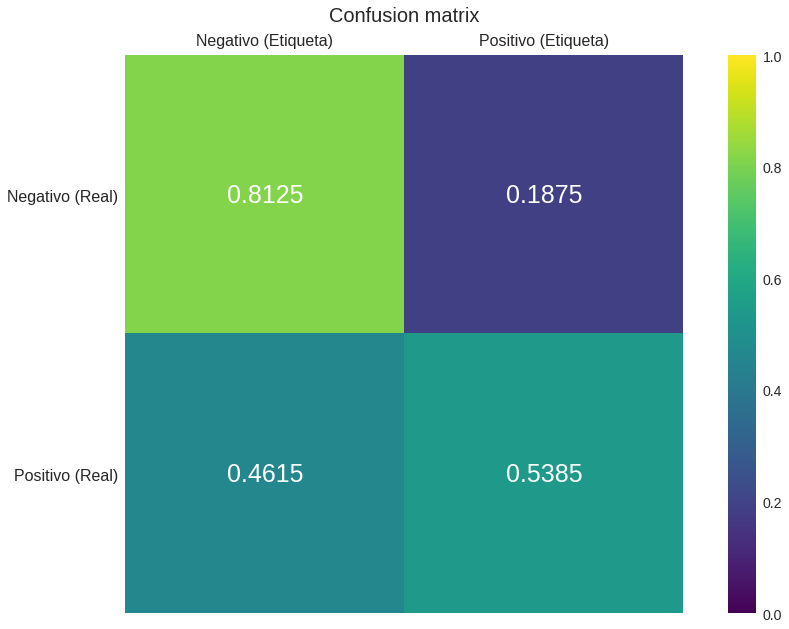

In [ ]:
cm = metrics.confusion_matrix(y_val,predictions_rfcl)
plotCMa(cm,['Negativo','Positivo'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


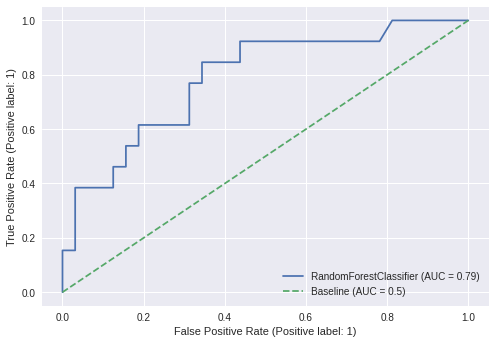

In [ ]:
plot_roc_curve(rndf_clf, X_val, y_val)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend()

Los gráficos de curva roc y matriz de confusión confirman que el modelo sigue siendo incapaz de distinguir con efectividad entre clases, pero esta vez, al menos es capaz clasificar como verdaderos negativos un poco más de la mitad de los pacientes con diabetes.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid = [{'n_estimators':[10,50,100,150,200,250,300,350,400,450,500],
              'max_depth':[2,4,6,8,10,12,14,16,18,20]}]

forest_clf = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV

grid_search_rf = GridSearchCV(forest_clf, param_grid, cv=4,
                          return_train_score=True, scoring='recall')

grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                          'n_estimators': [10, 50, 100, 150, 200, 250, 300, 350,
                                           400, 450, 500]}],
             return_train_score=True, scoring='recall')

In [ ]:
vres = grid_search_rf.cv_results_
print(cvres['mean_test_score'], cvres['params'])

print('Best Score: %s' % grid_search_rf.best_score_)
print('Mejores hiperparametros: %s' % grid_search_rf.best_params_)

[0.63316096 0.5741622  0.62642099 0.59382168 0.63601839 0.60514435
 0.64516906 0.59656926 0.63340368 0.62242983 0.64196061 0.61249208
 0.65310396 0.65191976 0.6587655  0.60854307 0.68031259 0.61991656
 0.63317091 0.60583062 0.64403454 0.61535473 0.61920949 0.60800251
 0.61519503 0.58508093 0.60866448 0.58985919 0.58622929 0.55837692
 0.57084596 0.55837692 0.56331824 0.54561339 0.57872083 0.54561339
 0.55350598 0.5623649  0.57926238 0.58068182 0.60080504 0.57025627
 0.59567038 0.57900718 0.60340692 0.55744108 0.56910052 0.56172579
 0.57338523] [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4}, {'n_neighbors': 5}, {'n_neighbors': 6}, {'n_neighbors': 7}, {'n_neighbors': 8}, {'n_neighbors': 9}, {'n_neighbors': 10}, {'n_neighbors': 11}, {'n_neighbors': 12}, {'n_neighbors': 13}, {'n_neighbors': 14}, {'n_neighbors': 15}, {'n_neighbors': 16}, {'n_neighbors': 17}, {'n_neighbors': 18}, {'n_neighbors': 19}, {'n_neighbors': 20}, {'n_neighbors': 21}, {'n_neighbors': 22

In [ ]:
rndf_clf = RandomForestClassifier(max_depth=6,n_estimators=10)
rndf_clf.fit(X_train, y_train)
y_pred = rndf_clf.predict(X_test)

rndf_clf.score(X_test, y_test)

0.7727272727272727

In [ ]:
# Se vuelve a generar una predicción, pero esta vez sobre la proporción de validación (la que desconoce la máquina)
predictions_rfcl = rndf_clf.predict(X_val)

# Y se imprimen las métricas correspondientes
print("Accuracy",np.round(rndf_clf.score(X_val, y_val),3))
print("Accuracy predicciones", np.round(accuracy_score(y_val, predictions_rfcl),3))
print("Precision", np.round(precision_score(y_val, predictions_rfcl),3))
print("Recall / Sensitivity", np.round(recall_score(y_val, predictions_rfcl),3))
print("Especificidad",np.round(recall_score(y_val, predictions_rfcl, pos_label=0),3)) 
print("AUC ROC", np.round(roc_auc_score(y_val, predictions_rfcl),3))
print("\n",classification_report(y_val, predictions_rfcl))

Accuracy 0.8
Accuracy predicciones 0.8
Precision 0.75
Recall / Sensitivity 0.462
Especificidad 0.938
AUC ROC 0.7

               precision    recall  f1-score   support

           0       0.81      0.94      0.87        32
           1       0.75      0.46      0.57        13

    accuracy                           0.80        45
   macro avg       0.78      0.70      0.72        45
weighted avg       0.79      0.80      0.78        45



Luego de buscar con gridsearch los mejores resultados y ajustar los hiperparámetros, se observa que el problema persiste, quizás mejoró un poco el recall en la clase 0, pero empeoró en la clase 1, aún cuando se buscó el mejor puntaje por recall en scoring de gridsearch 

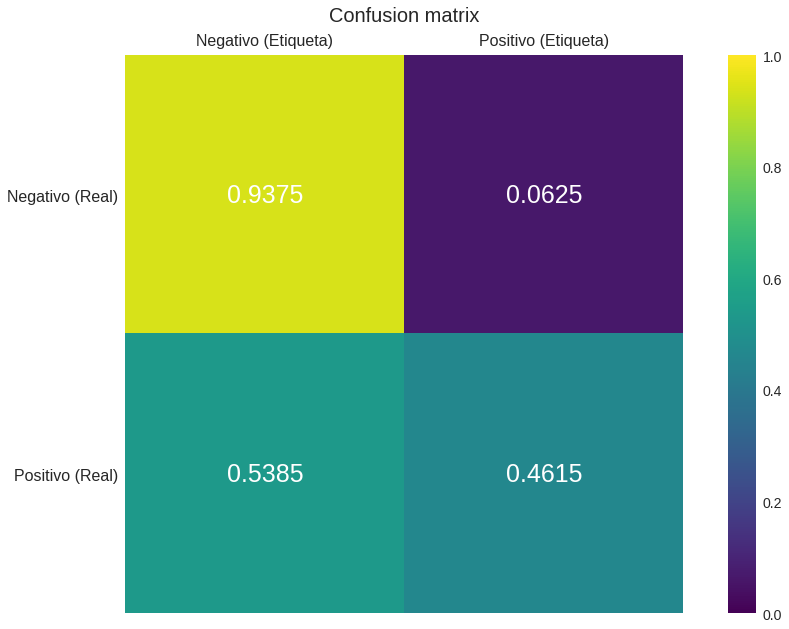

In [ ]:
cm = metrics.confusion_matrix(y_val,predictions_rfcl)
plotCMa(cm,['Negativo','Positivo'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


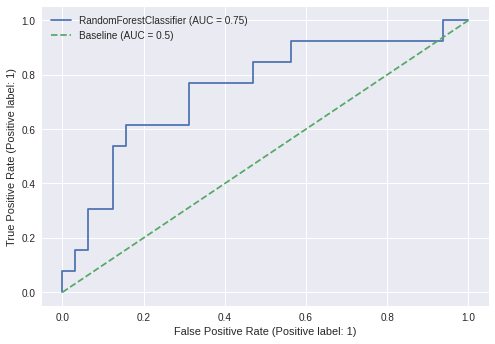

In [ ]:
plot_roc_curve(rndf_clf, X_val, y_val)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend()

Los gráficos confirman nuevamente que el modelo no está funcionando muy bien al menos para clasificar los valores reales negativos, no alcanza a llegar a la mitad.

# Regresión Logística

In [ ]:
# Se instancia
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test,y_test)

0.8181818181818182

In [ ]:
# Se vuelve a generar una predicción, pero esta vez sobre la proporción de validación (la que desconoce la máquina)
predictions_lrcl = log_reg.predict(X_val)

# Y se imprimen las métricas correspondientes
print("Accuracy",np.round(log_reg.score(X_val, y_val),3))
print("Accuracy predicciones", np.round(accuracy_score(y_val, predictions_lrcl),3))
print("Precision", np.round(precision_score(y_val, predictions_lrcl),3))
print("Recall / Sensitivity", np.round(recall_score(y_val, predictions_lrcl),3))
print("Especificidad",np.round(recall_score(y_val, predictions_lrcl, pos_label=0),3)) 
print("AUC ROC", np.round(roc_auc_score(y_val, predictions_lrcl),3))
print("\n",classification_report(y_val, predictions_lrcl))

Accuracy 0.756
Accuracy predicciones 0.756
Precision 0.6
Recall / Sensitivity 0.462
Especificidad 0.875
AUC ROC 0.668

               precision    recall  f1-score   support

           0       0.80      0.88      0.84        32
           1       0.60      0.46      0.52        13

    accuracy                           0.76        45
   macro avg       0.70      0.67      0.68        45
weighted avg       0.74      0.76      0.75        45



En los resultados de regresión logística por default, los resultados son buenos a excepción del recall, por ende no se podrían considerar buenos.

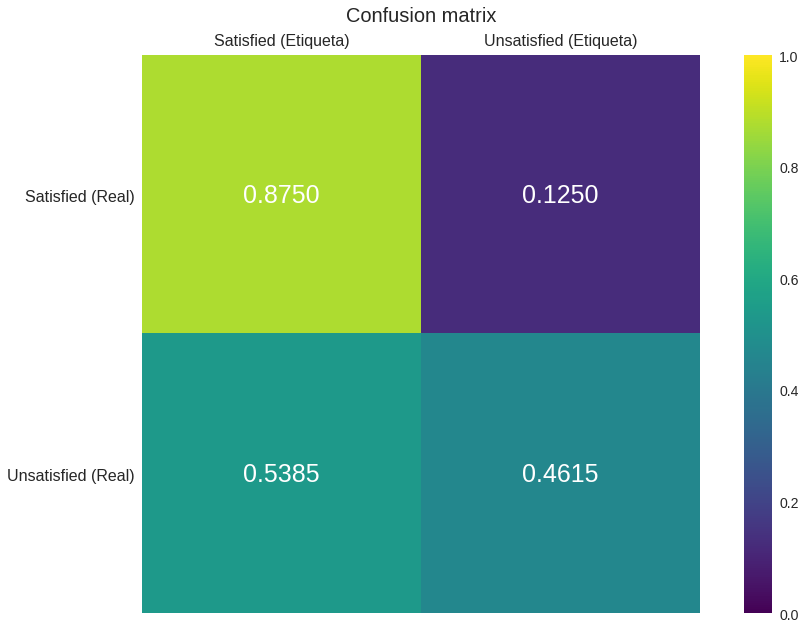

In [ ]:
cm = metrics.confusion_matrix(y_val,predictions_lrcl)
plotCMa(cm,['Satisfied','Unsatisfied'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


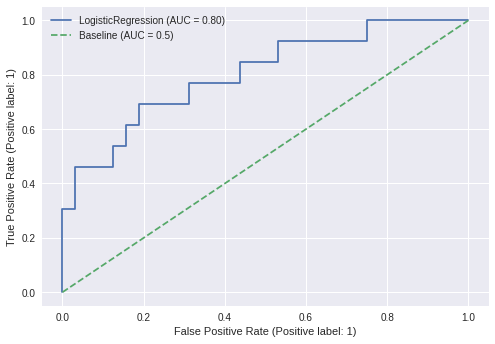

In [ ]:
plot_roc_curve(log_reg, X_val, y_val)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend()

La matriz de confusión y curva roc, confirman que el mismo problema continúa.
Se procede a buscar mejores resultados con grid search.

In [ ]:
param_grid = [
    {'C':[1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05,0.025],
    'class_weight':[{0: 0.2, 1: 0.8},{0: 0.17, 1: 0.83},{0: 0.1, 1: 0.9},{0: 0.05, 1: 0.95},{0: 0.15, 1: 0.85},{0: 0.25, 1: 0.75},{0: 0.3, 1: 0.7}],
    'penalty':['elasticnet', 'l1', 'l2'],
    'solver':['saga'],
    'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5]}
]

log_reg_clf = LogisticRegression()

from sklearn.model_selection import GridSearchCV


grid_search_lr = GridSearchCV(log_reg_clf, param_grid,cv=4,
                          return_train_score=True,scoring='recall_macro',verbose=1)

grid_search_lr.fit(X_train, y_train)

Fitting 4 folds for each of 1512 candidates, totalling 6048 fits


Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio pa

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid=[{'C': [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1,
                                0.05, 0.025],
                          'class_weight': [{0: 0.2, 1: 0.8}, {0: 0.17, 1: 0.83},
                                           {0: 0.1, 1: 0.9}, {0: 0.05, 1: 0.95},
                                           {0: 0.15, 1: 0.85},
                                           {0: 0.25, 1: 0.75},
                                           {0: 0.3, 1: 0.7}],
                          'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
                          'penalty': ['elasticnet', 'l1', 'l2'],
                          'solver': ['saga']}],
             return_train_score=True, scoring='recall_macro', verbose=1)

In [ ]:
vres = grid_search_lr.cv_results_
print(cvres['mean_test_score'], cvres['params'])

print('Best Score: %s' % grid_search_lr.best_score_)
print('Mejores hiperparametros: %s' % grid_search_lr.best_params_)

[0.63316096 0.5741622  0.62642099 0.59382168 0.63601839 0.60514435
 0.64516906 0.59656926 0.63340368 0.62242983 0.64196061 0.61249208
 0.65310396 0.65191976 0.6587655  0.60854307 0.68031259 0.61991656
 0.63317091 0.60583062 0.64403454 0.61535473 0.61920949 0.60800251
 0.61519503 0.58508093 0.60866448 0.58985919 0.58622929 0.55837692
 0.57084596 0.55837692 0.56331824 0.54561339 0.57872083 0.54561339
 0.55350598 0.5623649  0.57926238 0.58068182 0.60080504 0.57025627
 0.59567038 0.57900718 0.60340692 0.55744108 0.56910052 0.56172579
 0.57338523] [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4}, {'n_neighbors': 5}, {'n_neighbors': 6}, {'n_neighbors': 7}, {'n_neighbors': 8}, {'n_neighbors': 9}, {'n_neighbors': 10}, {'n_neighbors': 11}, {'n_neighbors': 12}, {'n_neighbors': 13}, {'n_neighbors': 14}, {'n_neighbors': 15}, {'n_neighbors': 16}, {'n_neighbors': 17}, {'n_neighbors': 18}, {'n_neighbors': 19}, {'n_neighbors': 20}, {'n_neighbors': 21}, {'n_neighbors': 22

Grid search indica que los mejores hierparámetros son 
'C': 0.1, 'class_weight': {0: 0.3, 1: 0.7}, 'l1_ratio': 0.1, 'penalty': 'elasticnet', 'solver': 'saga', por lo que ajusta el modelo con estos hiperparámetros.

In [ ]:
# Se instancia
log_reg = LogisticRegression(C=0.1, class_weight={0: 0.35, 1: 0.65}, l1_ratio=0.1, penalty='elasticnet', solver='saga')
log_reg.fit(X_train, y_train)
log_reg.score(X_test,y_test)

0.8636363636363636

In [ ]:
# Se vuelve a generar una predicción, pero esta vez sobre la proporción de validación (la que desconoce la máquina)
predictions_lrcl = log_reg.predict(X_val)

# Y se imprimen las métricas correspondientes
print("Accuracy",np.round(log_reg.score(X_val, y_val),3))
print("Accuracy predicciones", np.round(accuracy_score(y_val, predictions_lrcl),3))
print("Precision", np.round(precision_score(y_val, predictions_lrcl),3))
print("Recall / Sensitivity", np.round(recall_score(y_val, predictions_lrcl),3))
print("Especificidad",np.round(recall_score(y_val, predictions_lrcl, pos_label=0),3)) 
print("AUC ROC", np.round(roc_auc_score(y_val, predictions_lrcl),3))
print("\n",classification_report(y_val, predictions_lrcl))

Accuracy 0.733
Accuracy predicciones 0.733
Precision 0.529
Recall / Sensitivity 0.692
Especificidad 0.75
AUC ROC 0.721

               precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.53      0.69      0.60        13

    accuracy                           0.73        45
   macro avg       0.69      0.72      0.70        45
weighted avg       0.76      0.73      0.74        45



Los resultados mejoran levemente con logistic regresion al aplicar el grid search, al menos el recall mejoró un poco, y la presición es medianamente aceptable.

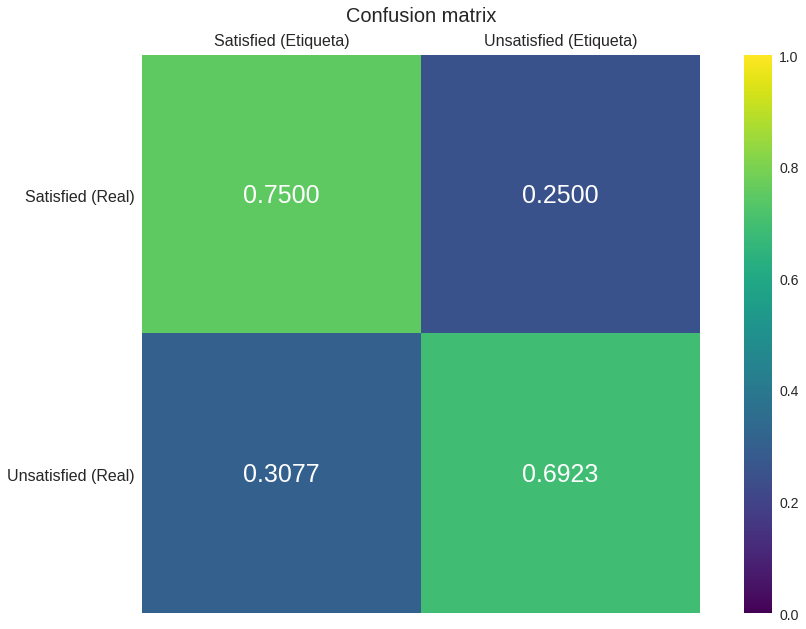

In [ ]:
cm = metrics.confusion_matrix(y_val,predictions_lrcl)
plotCMa(cm,['Satisfied','Unsatisfied'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


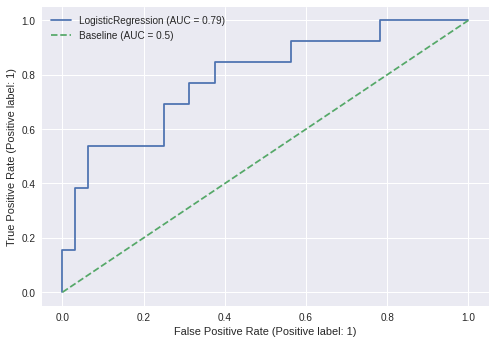

In [ ]:
plot_roc_curve(log_reg, X_val, y_val)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend()

Estos últimos gráficos muestran que el modelo con estos hiperparámetros ha mejorado la discriminación de los verdaderos negativos y positivos, aproximadamente el 70% de los casos es acertado.

# Conclusones

Se solicita seleccionar un modelo de clasficicación y justificar por qué se elige este como el mejor, y de acuerdo a todo lo anterior, es evidente que el mejor resultado lo otorga la regresión logística, tanto en l precisión como en su capacidad para discriminar de manera balanceada ambas clases, además por el hecho de que este modelo, permite ajustar más hiperparámetros que los demás, poniendo especial énfases en el balanceo de clases.




Por otro lado, es muy importante mencionar el hecho de que este conjunto de datos contiene muchos inconvenientes para ser trabajado, ya que por ejemplo, es muy pequeño, contenía muchos datos faltantes, outliers e información incongruente que debe ser tratada, haciendo que el tamaño disminuya aún más; las clases estan desbalanceadas y eso siempre genera problemas cuando se busca clasificarlas, aún cuando se ajustan los hiperparámetros, existen modelos que nunca podrán ajustarse bien debido a este problema.